###  인구현황 데이터 분석

1. data/인구현황.csv를 사용하세요
2. 연습문제/인구현황분석.ipynb 코드 완성하세요


1] 지역별 총 인구수 TOP5

In [2]:
import pandas as pd

#csv 파일 불러오기 
data = pd.read_csv('C:\_Python\Python_WebScraping_Analysis\data\인구현황.csv')
print(data.shape) #shape = property / 몇행 몇열인지 확인
print(type(data)) #데이터 타입 확인- dataframe(표 형식으로 가져옴)

(18, 8)
<class 'pandas.core.frame.DataFrame'>


In [47]:
# head() 함수
#print(data)
data.head() #첫번째 부터 5개의 행 데이터 가져옴 / head() 함수는 기본 수치값이 디폴트가 5로 되어있음

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,1000000000,전국,51217221,24118928,2.12,25498324,25718897,0.99
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00


In [3]:
#총인구수 순서대로 나열
data.loc[1:17,['행정기관','총인구수']].sort_values(by='총인구수',ascending=True).reset_index(drop=False).head(5)
#총 인구수를 대상으로 내림차순 정렬 후 .head() 함수를 이용해 그중 상위 5개만 출력

,index,행정기관,총인구수
0,8,세종특별자치시,390685
1,17,제주특별자치도,670368
2,7,울산광역시,1098049
3,5,광주광역시,1408422
4,6,대전광역시,1439157


In [4]:
#지역별 총인구수 plot
people_df = data.loc[data['행정기관'] == '서울특별시',['총인구수','세대수','세대당 인구','남자 인구수','여자 인구수','남여 비율']]
people_df


,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,9331828,4482063,2.08,4505355,4826473,0.93


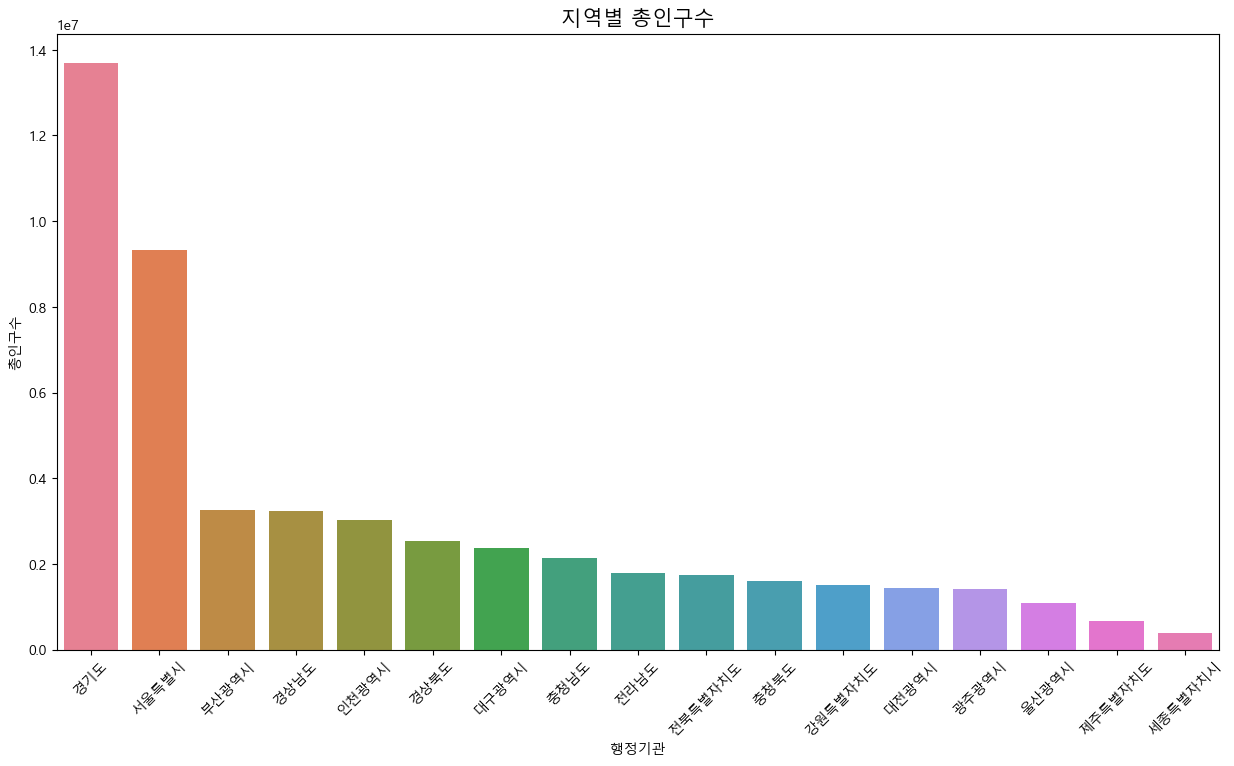

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# 한글 깨짐 방지 설정 (Windows 기준)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 정렬 (전체 데이터를 인구순으로 내림차순 정렬)
plot_data = data.loc[1:17].sort_values(by='총인구수', ascending=False)

# 그래프 크기 설정
plt.figure(figsize=(15, 8))

# 막대 그래프 그리기 (x축: 행정기관, y축: 총인구수)
sns.barplot(x='행정기관', y='총인구수', data=plot_data, hue = '행정기관')

# 제목 및 라벨 설정
plt.title('지역별 총인구수', fontsize=15)
plt.xticks(rotation=45) # x축 글자 겹침 방지를 위해 회전

plt.show()

2] 세대당 인구수 높은 지역 TOP5

In [7]:
#세대당 인구수 높은 지역
data.loc[1:17, ['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).reset_index(drop=True).head(5)


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


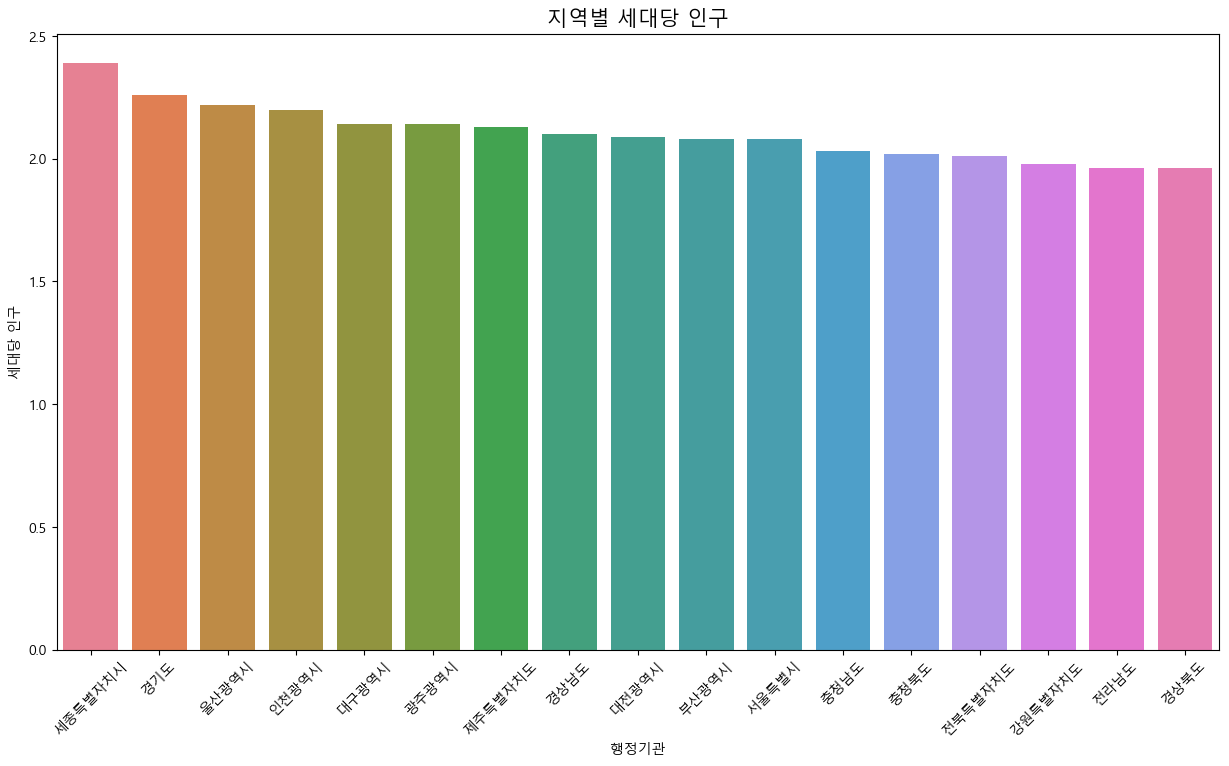

In [8]:

# 한글 깨짐 방지 설정 (Windows 기준)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 정렬 (전체 데이터를 인구순으로 내림차순 정렬)
plot_data = data.loc[1:17].sort_values(by='세대당 인구', ascending=False)

# 그래프 크기 설정
plt.figure(figsize=(15, 8))

# 막대 그래프 그리기 (x축: 행정기관, y축: 총인구수)
sns.barplot(x='행정기관', y='세대당 인구', data=plot_data, hue="행정기관")

# 제목 및 라벨 설정
plt.title('지역별 세대당 인구', fontsize=15)
plt.xticks(rotation=45) # x축 글자 겹침 방지를 위해 회전

plt.show()

3] 남녀 비율 분석

In [9]:
#행정기관과 남여비율 컬럼만 추출하여 정렬
data.loc[1:17, ['행정기관', '남여 비율']].sort_values(by='남여 비율', ascending=False).reset_index(drop=True)


,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


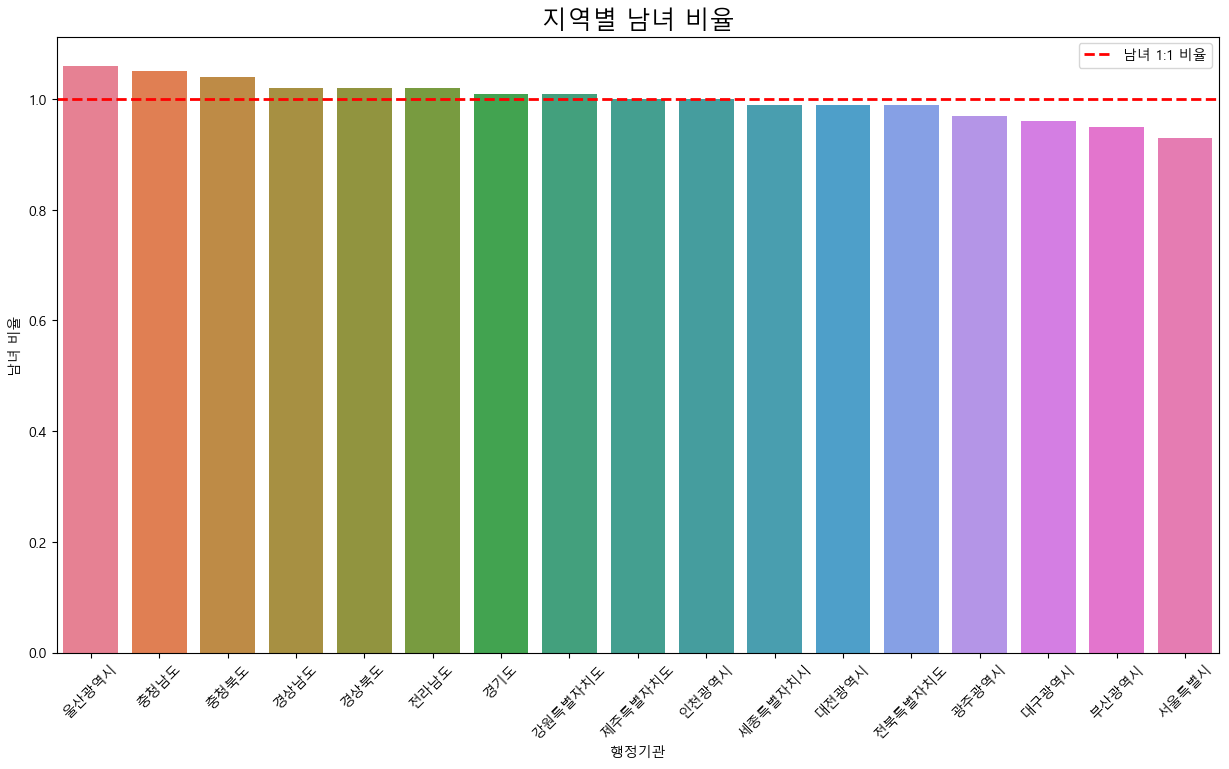

In [11]:
#한글 폰트 설정 
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# '남여 비율' 컬럼을 기준으로 내림차순 정렬
gender_df = data.loc[1:17].sort_values(by='남여 비율', ascending=False)

# 그래프 그리기
plt.figure(figsize=(15,8))
# x축: 행정기관, y축: 남여 비율
sns.barplot(x='행정기관', y='남여 비율', data=gender_df,hue="행정기관")

# 4. 남녀 균형 기준선(1.0) 추가 (이미지의 빨간 점선)
# axhline은 수평선을 그려줌
plt.axhline(y=1.0, color='r', linestyle='--', linewidth=2, label='남녀 1:1 비율')

# 5. 그래프 꾸미기
plt.title('지역별 남녀 비율', fontsize=18)
plt.xticks(rotation=45) # x축 지자체 이름 회전
plt.ylabel('남녀 비율')
plt.legend() # 기준선 라벨 표시

plt.show()

4] 남자초과/여자초과 분석

In [ ]:
import numpy as np

gender_analysis = data.loc[1:17].copy() #위 지역 데이터 복사

# '남여 비율'이 1.0보다 크면 '남초', 작으면 '여초', 같으면 '동일'
# np.where() -> 비율이 1.0보다 크면 '남초' 아니면 '여초'로 출력. 즉, if문과 같은 기능
gender_analysis['남초여초'] = np.where(gender_analysis['남여 비율'] > 1.0, '남초', np.where(gender_analysis['남여 비율'] < 1.0, '여초', '동일'))

gender_analysis[['행정기관', '남여 비율', '남초여초']]

,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


5] 세대당 인구 평균보다 높은 지역

In [17]:
#전체 세대당 평균 계산
avg_people = data.loc[1:17,'세대당 인구'].mean()
print(f'전국 평균 세대당 인구 수 : {avg_people:.2f}')

#평균보다 높은 지역 필터링
high_avg = data.loc[1:17, ['행정기관', '세대당 인구']]
high_avg = high_avg[high_avg['세대당 인구']>avg_people].sort_values(by='세대당 인구', ascending=False)

high_avg.reset_index(drop=True)

전국 평균 세대당 인구 수 : 2.11


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


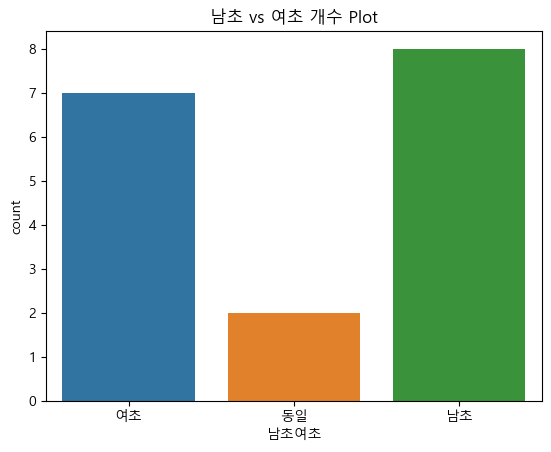

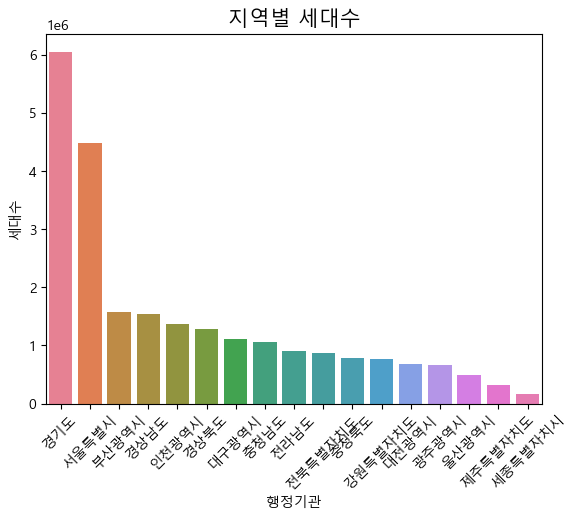

In [ ]:
plt.Figure(figsize=(10,5))
#이전 단계에서 만든 '남초여초' 컬럼 빈도수 자동 계산
sns.countplot(x='남초여초' , data=gender_analysis, order=['여초','동일','남초'],hue="남초여초")

plt.title('남초 vs 여초 개수 Plot')
plt.show()

#지역별 세대수 plot

#세대수 기준으로 내림차순 정렬
housepeople_df = data.loc[1:17].sort_values(by='세대수',ascending=False)

plt.Figure(figsize=(15,6)) #그래프 크기 설정
sns.barplot(x='행정기관', y='세대수', data=housepeople_df, hue='행정기관')

plt.title('지역별 세대수', fontsize=15)
plt.xticks(rotation=45)
plt.show()

6] 남자 인구 vs 여자 인구 비교 Plot ( 선택 )


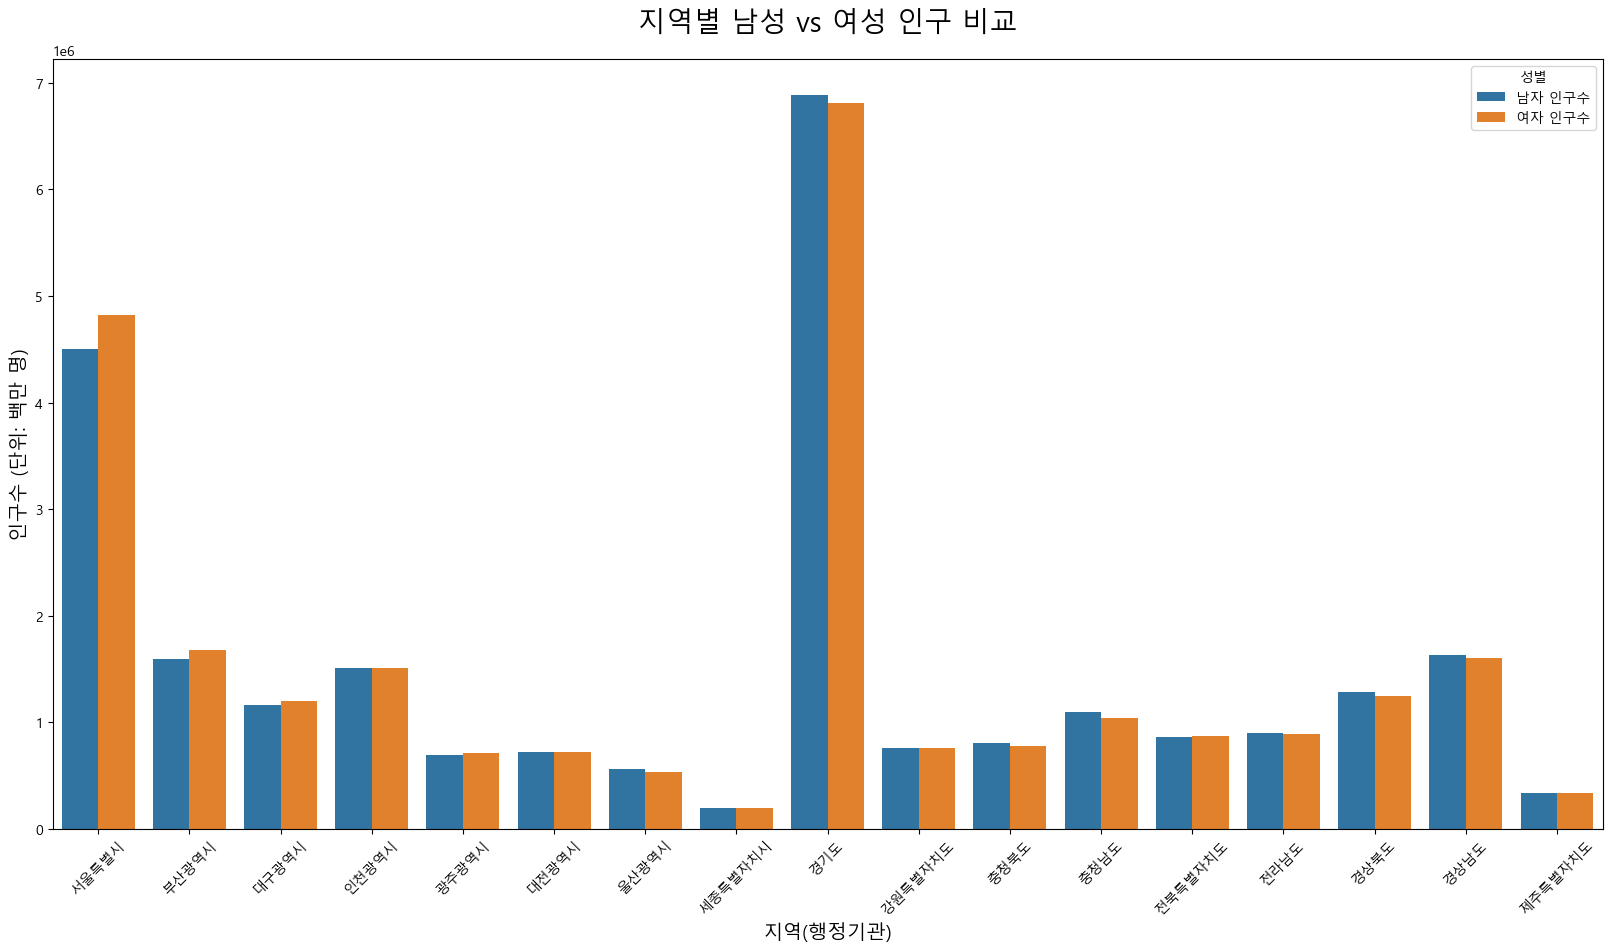

In [ ]:
# 1. 한글 설정 및 그래프 크기 지정
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(20, 10))

# 2. 데이터 재구조화 (Melt)
# 지역명(행정기관)을 기준으로 '남자 인구수'와 '여자 인구수'를 하나의 열로 합
# 이렇게 해야 Seaborn에서 hue(색상 구분) 옵션 사용 가능
data_melted = data.loc[1:17].melt(id_vars='행정기관', 
                                  value_vars=['남자 인구수', '여자 인구수'], 
                                  var_name='성별', 
                                  value_name='인구수')

# 3. 막대 그래프 그리기
# x축은 지역, y축은 인구수, 색상(hue)은 성별로 구분
sns.barplot(x='행정기관', y='인구수', hue='성별', data=data_melted)

# 4. 그래프 꾸미기
plt.title('지역별 남성 vs 여성 인구 비교', fontsize=20, pad=20)
plt.xlabel('지역(행정기관)', fontsize=14)
plt.ylabel('인구수 (단위: 백만 명)', fontsize=14)
plt.xticks(rotation=45) # 지역명이 겹치지 않게 회전
plt.legend(title='성별') # 범례 추가

plt.show()